In [271]:
import numpy as np
import scipy
import scipy.constants
import matplotlib.pyplot as plt
import pandas as pd

In [272]:
c = scipy.constants.c
print(c)

299792458.0


In [273]:
df1 =pd.read_csv('M3_a_02.02.2024,15.22,256.03µW.csv')


t1 = df1.get("Time  [ms]")
t1 = t1[::2]
t1 = t1.to_numpy()

wavelength = df1.get("Signal 1  Wavelength, vac.  [nm]")
freq = c/wavelength

freq = freq[::2]
freq = freq.to_numpy()

Text(0, 0.5, 'Frequency (GHz)')

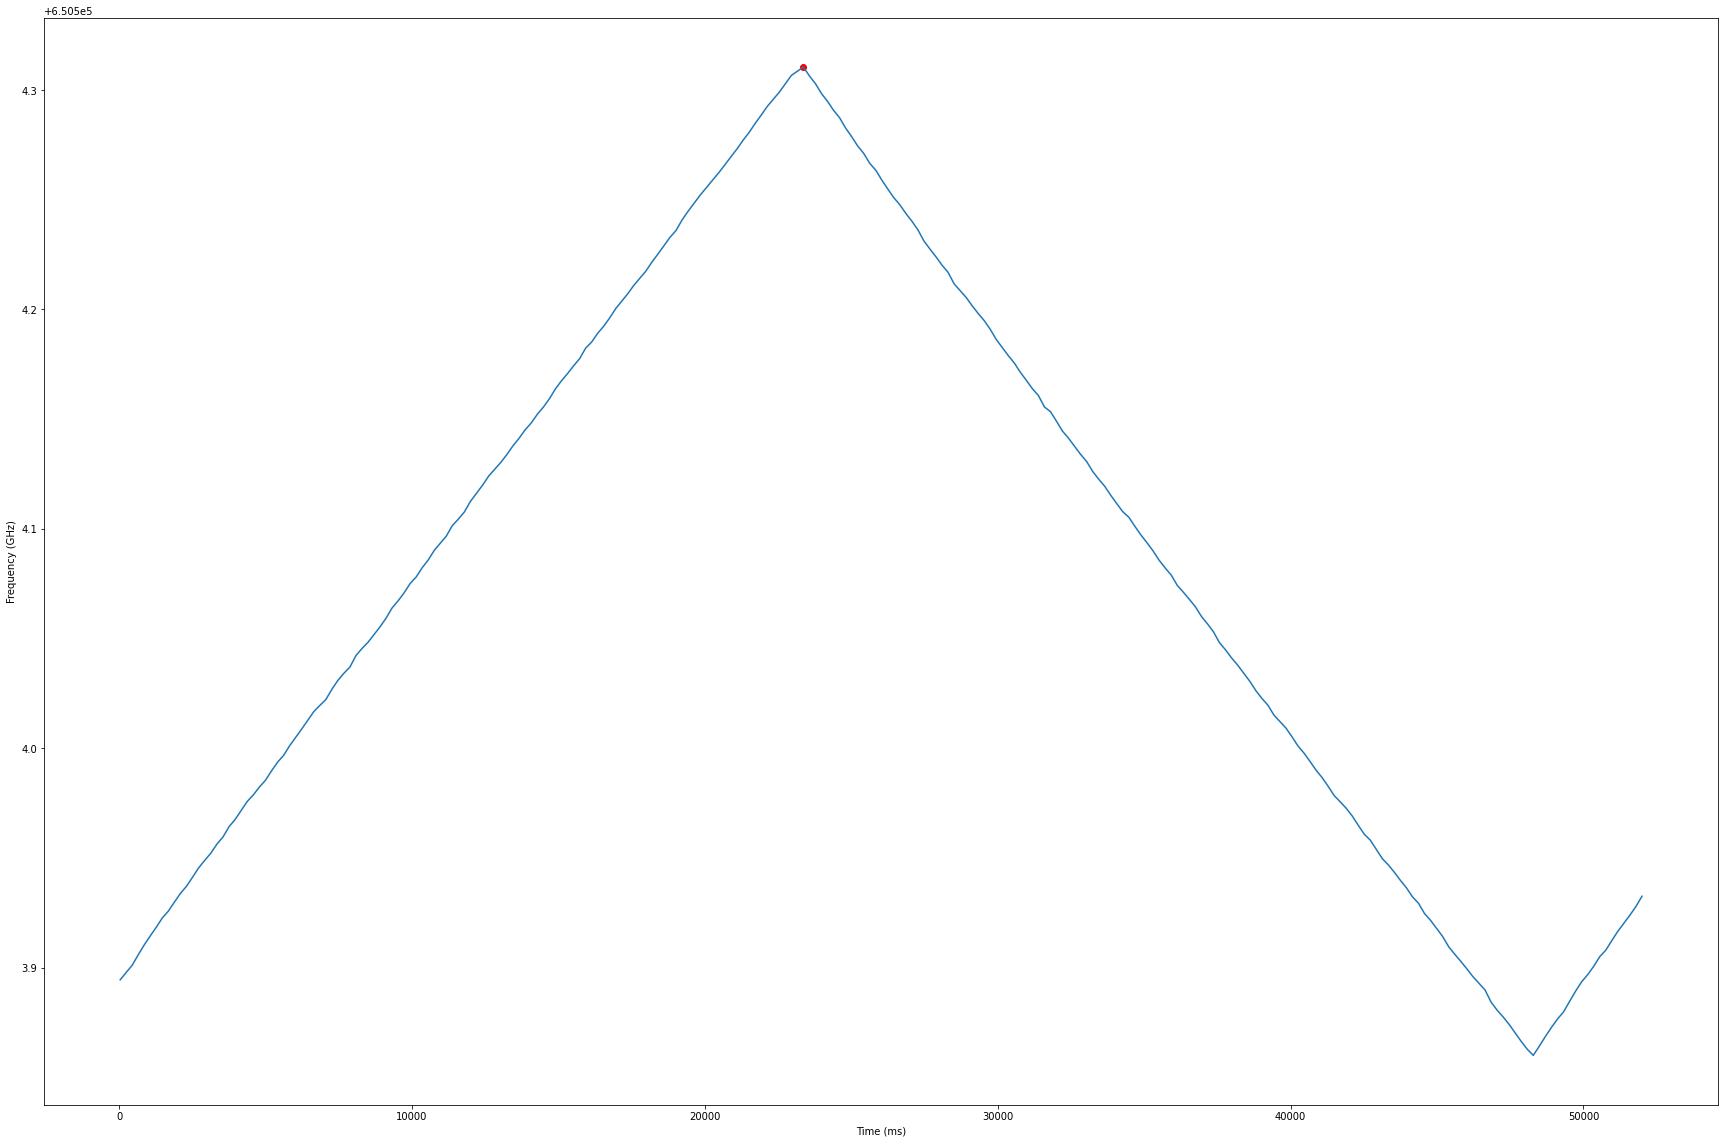

In [274]:
from scipy.signal import find_peaks
maxima_indices1, _ = find_peaks(freq, prominence=0.01)
plt.plot(t1, freq, label='Original Data')
plt.scatter(t1[maxima_indices1], freq[maxima_indices1], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (GHz)')

In [275]:
T1 = t1[maxima_indices1]
print(maxima_indices1,T1)

[111] [23368.7076]


In [276]:
df2 =pd.read_csv('test_a.csv')

t2 = df2.get("Time(s)")
Fluor = df2.get("Channel A(mV)")
t2 = t2*1000

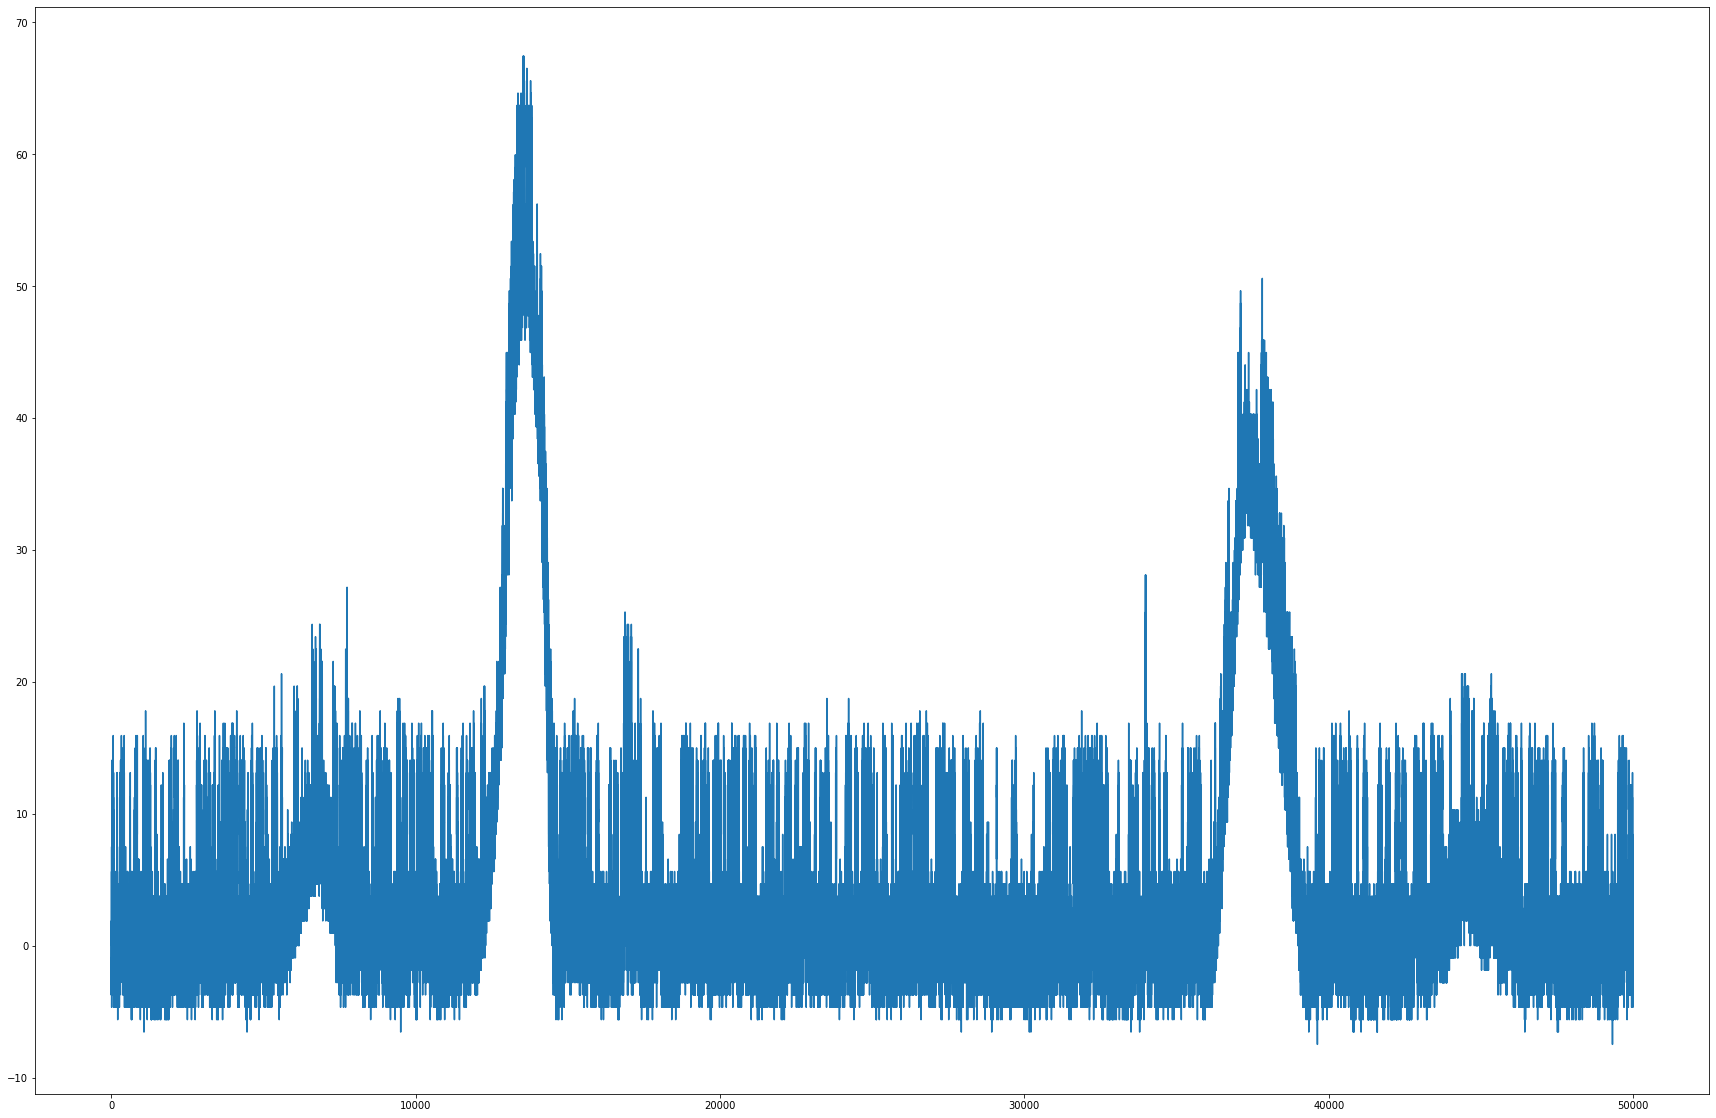

In [277]:
plt.rcParams["figure.figsize"] = (30, 20)
plt.plot(t2,Fluor)

In [278]:
from scipy.signal import savgol_filter
#w = savgol_filter(Fluor, 20001, 2)
#plt.plot(t2, w)

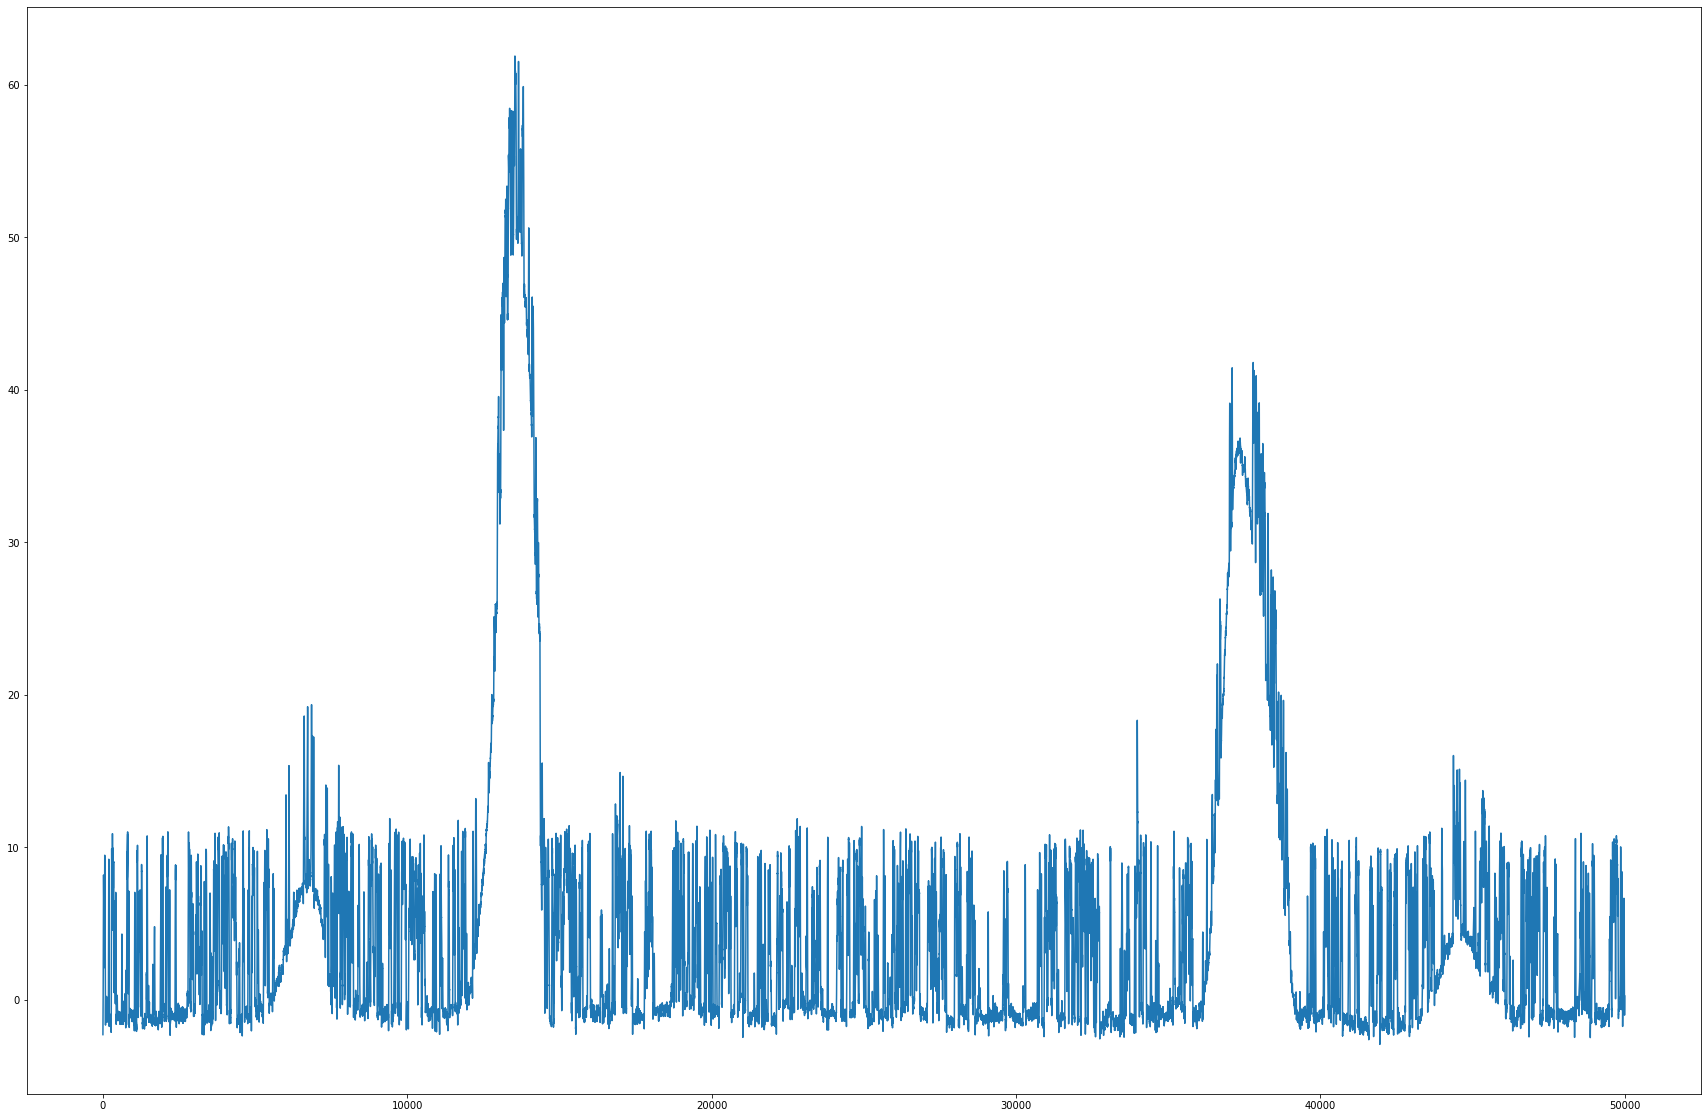

In [279]:
from scipy.signal import savgol_filter
w2 = savgol_filter(Fluor, 500, 2)
plt.plot(t2, w2)

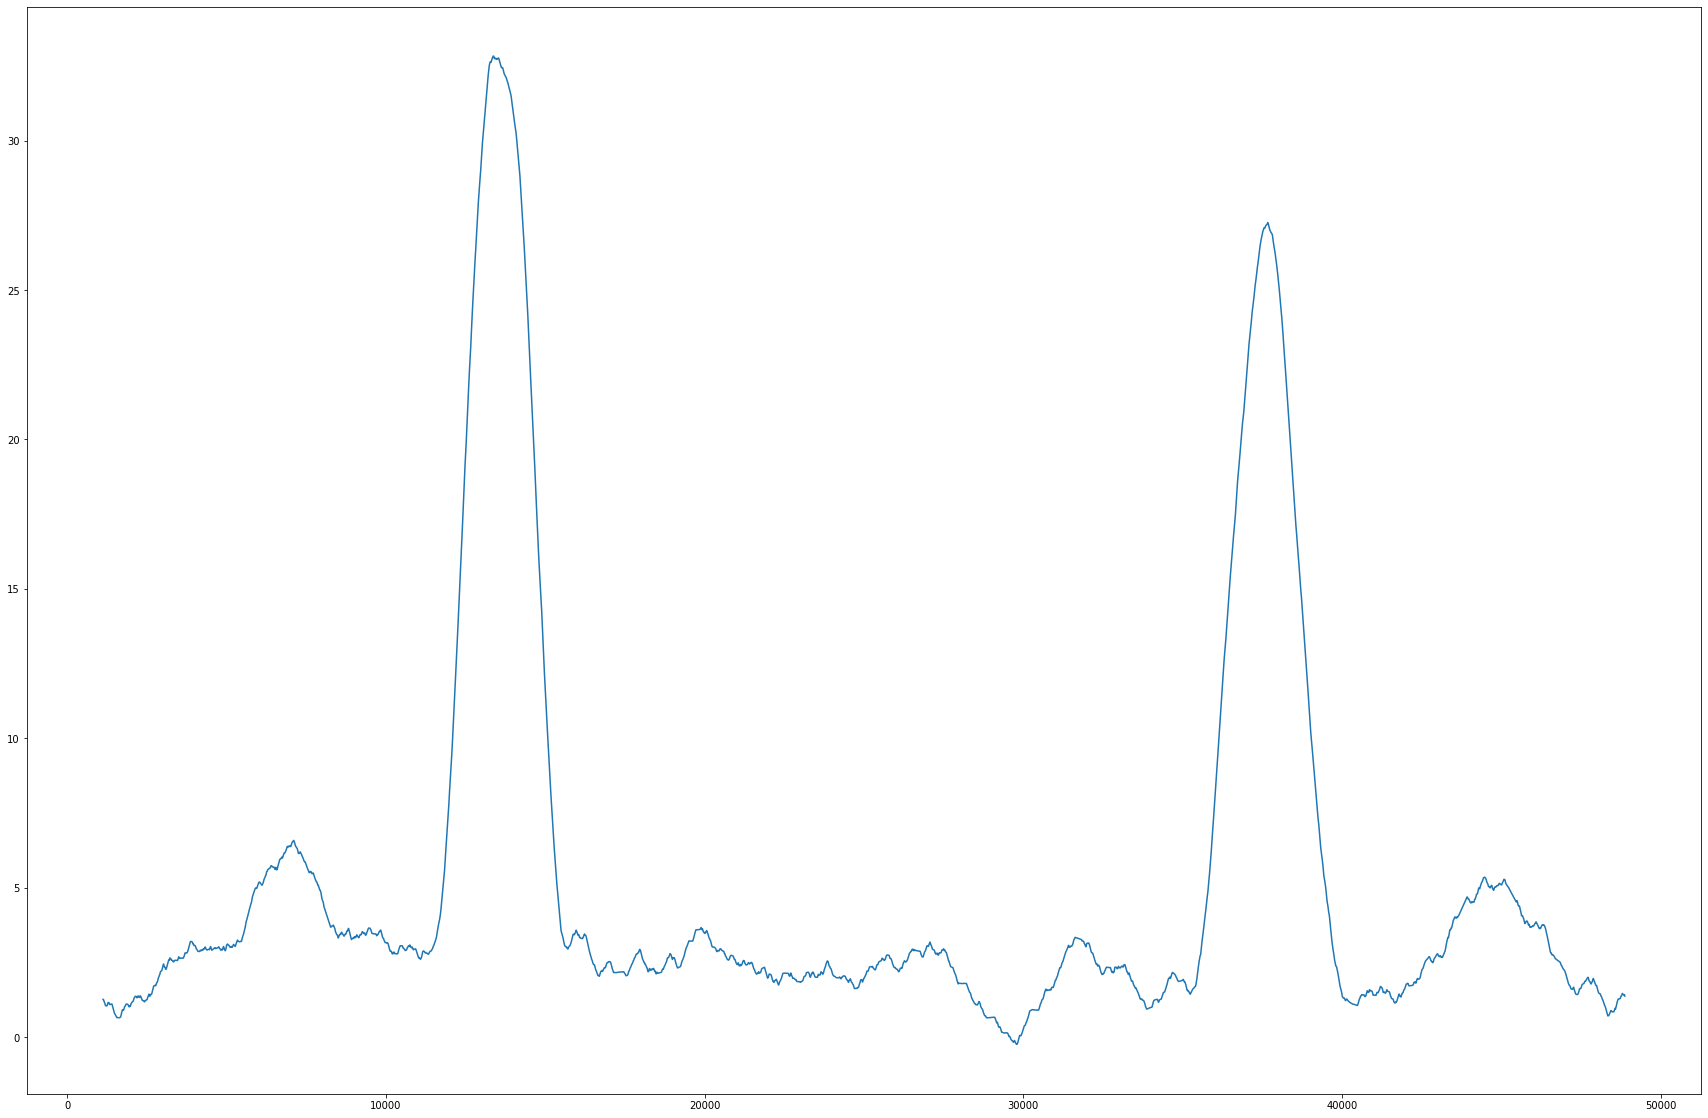

In [280]:
import numpy as np

def remove_constant_noise(data, window_size):
    """
    Removes constant noise from data using a moving average filter.
    
    Parameters:
        data (array-like): The input data.
        window_size (int): Size of the moving average window.
        
    Returns:
        array: Data with constant noise removed.
    """
    # Apply a moving average filter
    filtered_data = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
    return filtered_data

# Example usage
filtered_data = remove_constant_noise(w2, 45000)
filtered_time = remove_constant_noise(t2, 45000)
plt.plot(filtered_time, filtered_data)

In [281]:
w2 = filtered_data
t2 = filtered_time

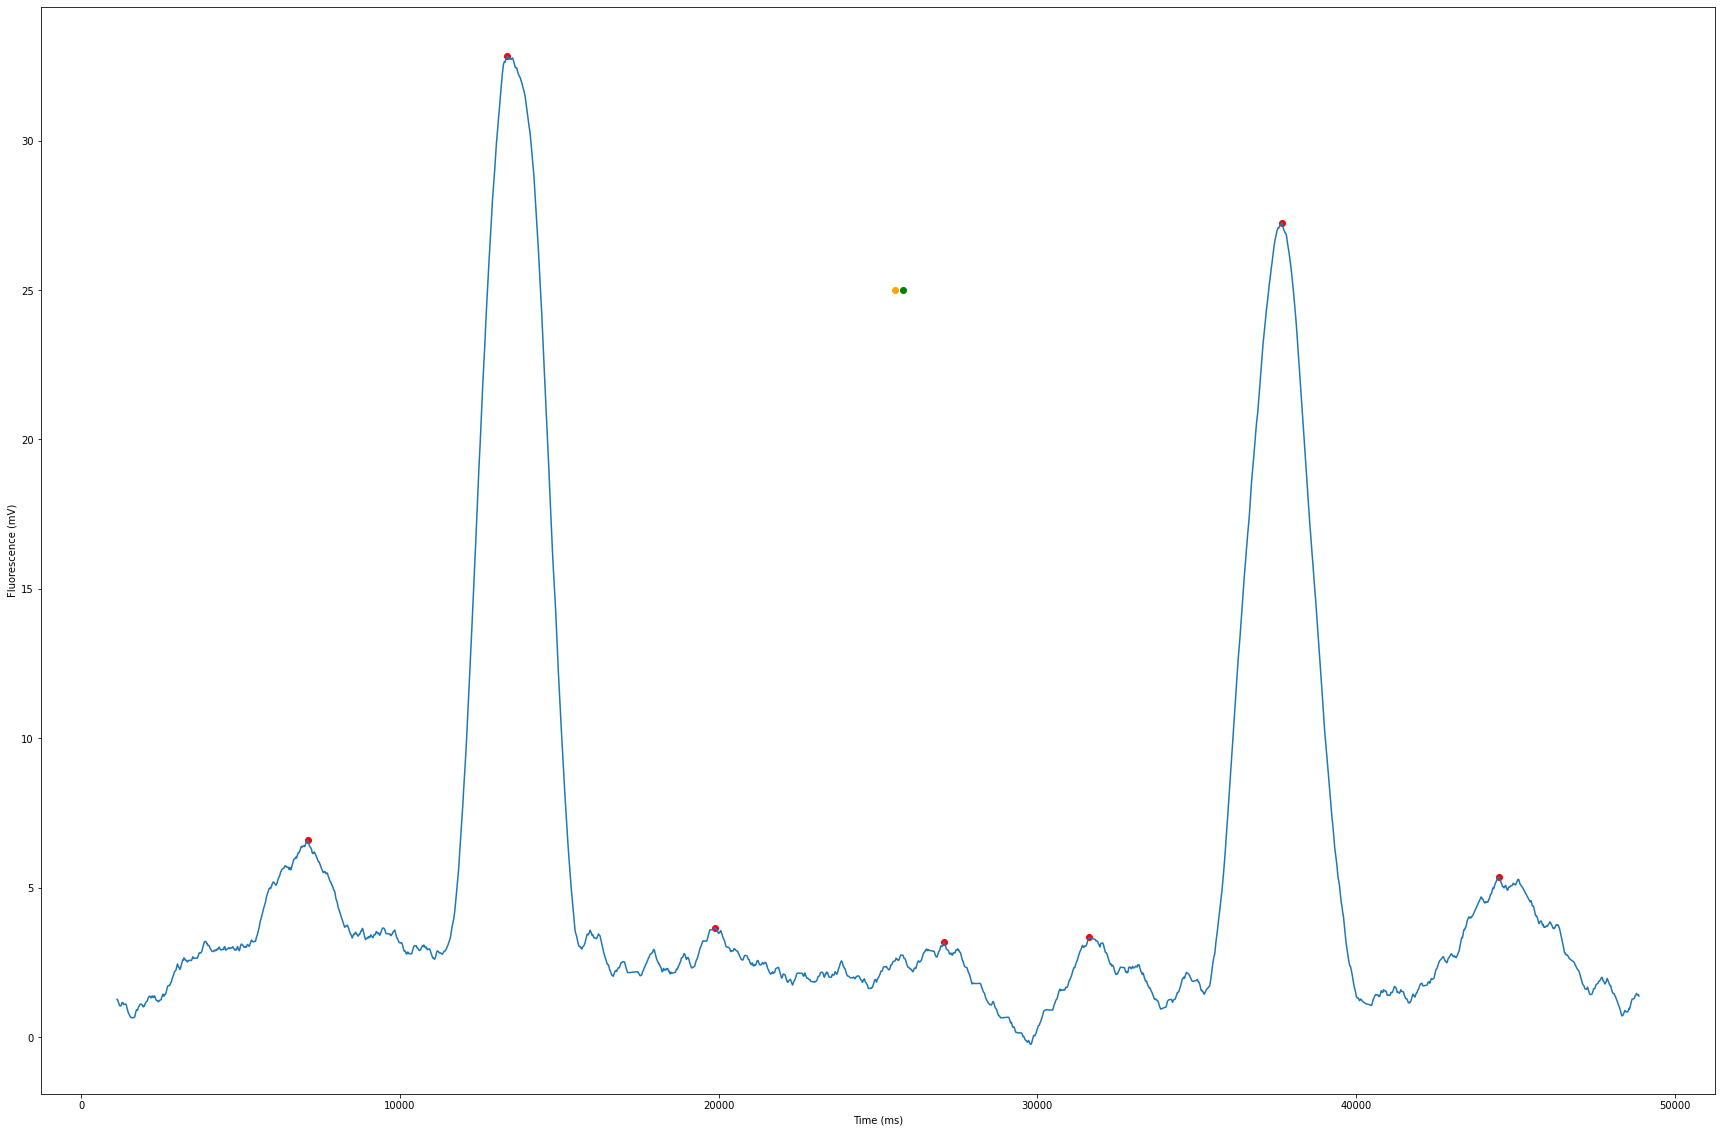

In [282]:
from scipy.signal import find_peaks
maxima_indices2, _ = find_peaks(w2, prominence=1)
plt.plot(t2, w2, label='Original Data')
plt.scatter(t2[maxima_indices2], w2[maxima_indices2], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Fluorescence (mV)')

plt.scatter(25789.424348435336,25,color = 'green')
plt.scatter(25520.29935532,25,color = 'orange')

In [283]:
I = w2[maxima_indices2]
for i in range(np.size(I)):
    if I[i]>5:
        print ('intensity: '+str(I[i])+' index: '+str(i))

intensity: 6.577835726145002 index: 0
intensity: 32.828161731245864 index: 1
intensity: 27.2542545145057 index: 5
intensity: 5.3459476335177945 index: 6


In [325]:
print(32.828161731245864/27.2542545145057)
print(6.577835726145002/5.3459476335177945)



print(6.577835726145002/32.828161731245864   ,  5.3459476335177945/27.2542545145057  )

1.2045151230892603
1.2304339991853956
0.20037173509731476 0.19615093968805816


In [285]:
#T2 = t2[maxima_indices2]


#mid = T2[0] + ( (T2[6] - T2[0])/2)
#print('midpoint: ' + str(mid) + ' ms')

In [286]:
T2 = t2[maxima_indices2]


mid = T2[1] + ( (T2[5] - T2[1])/2)
print('midpoint: ' + str(mid) + ' ms')

midpoint: 25520.29935532 ms


In [287]:
t1 = df1.get("Time  [ms]")
t1 = t1[::2]
t1 = t1.to_numpy()

offset= mid-T1 
t1 = t1+offset

#offset= 25950-T1 
#t1 = t1+offset

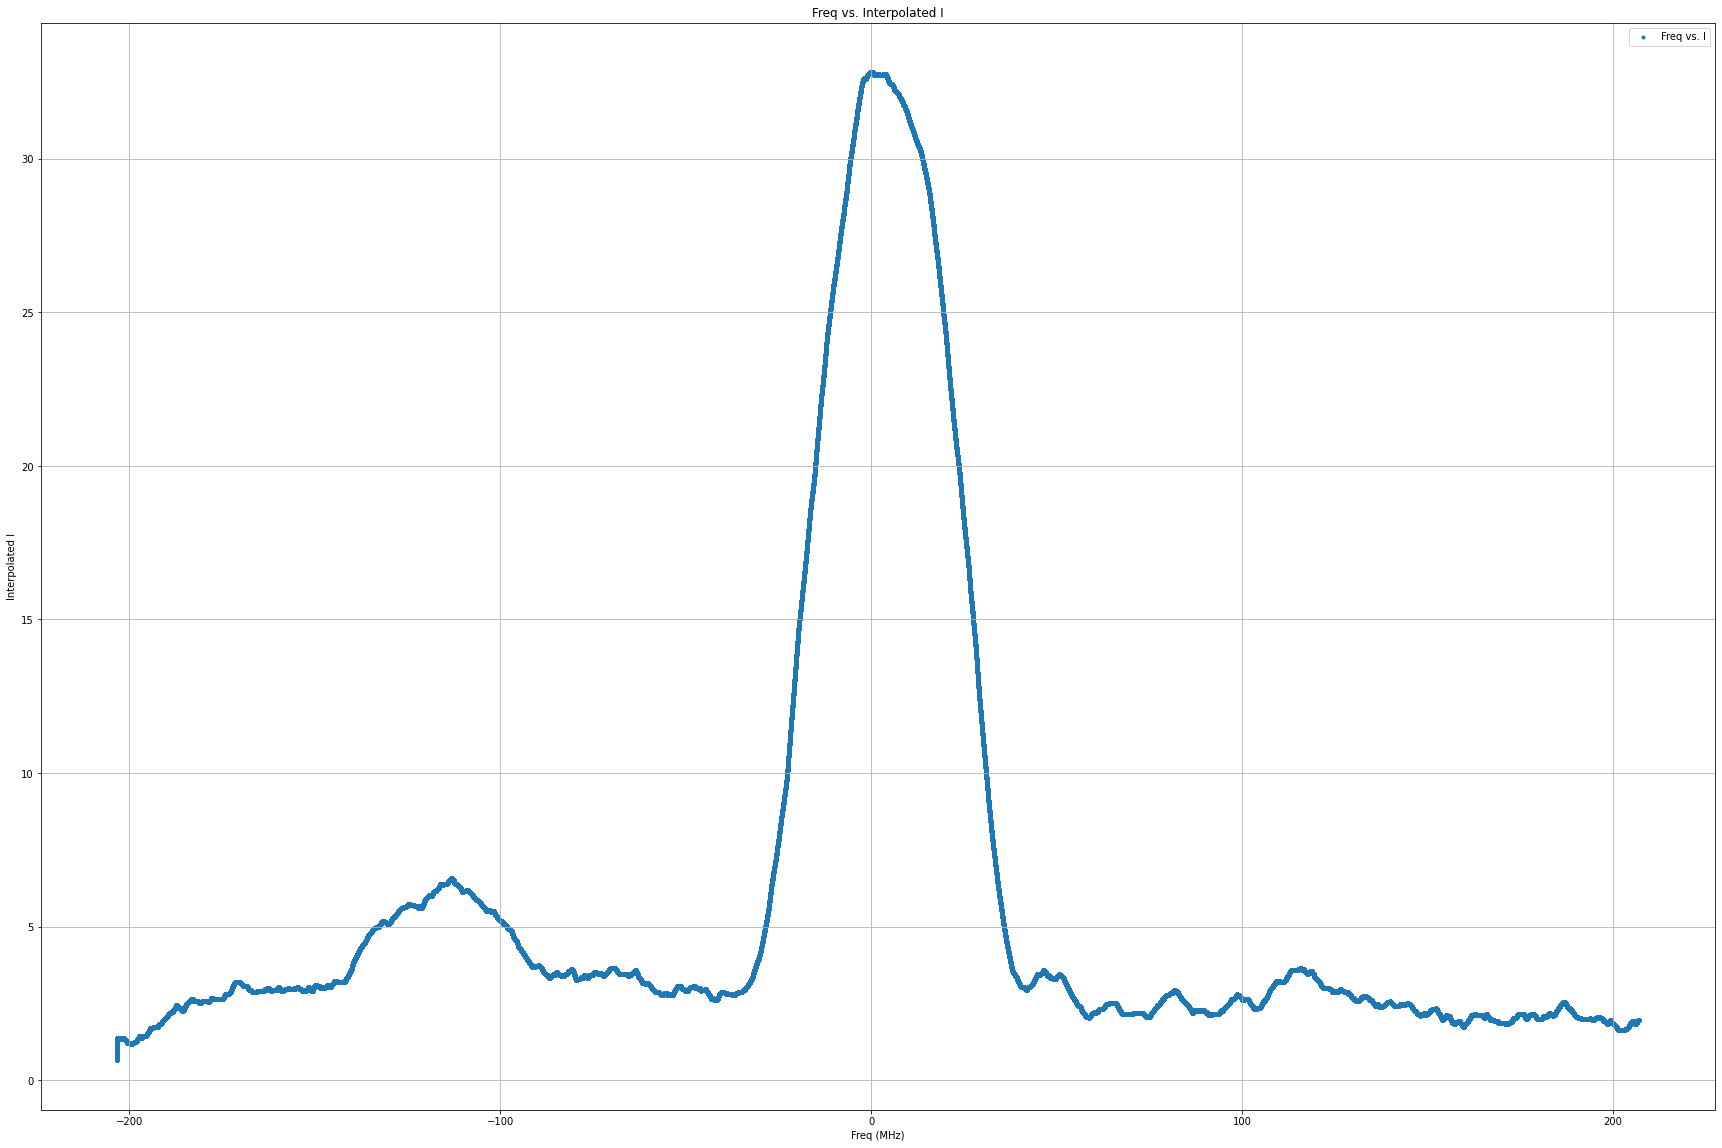

In [324]:
f_interpolated = np.interp(t2, t1, freq)

f_interpolated = f_interpolated-650504.097689418





plt.scatter(f_interpolated[:477502]*1000, w2[:477502], marker='.', label='Freq vs. I')


#plt.plot(650504.097689418,32.828161731245864,'o', color = 'orange')

#bounds
#plt.plot(650504.105,32.828161731245864,'o', color = 'orange')
#plt.plot(650504.095,32.828161731245864,'o', color = 'orange')


plt.ylabel('Interpolated I')
plt.xlabel('Freq (MHz)')
plt.title('Freq vs. Interpolated I')


plt.grid(which = 'both')
plt.legend()
plt.show()

In [233]:

print(np.max(w2), np.argmax(w2))
res = f_interpolated[np.argmax(w2)]

print(res)

32.828161731245864 244885
650504.3067010444


In [318]:
(650504.097689418-650504.0855669753)*1000

12.122442713007331

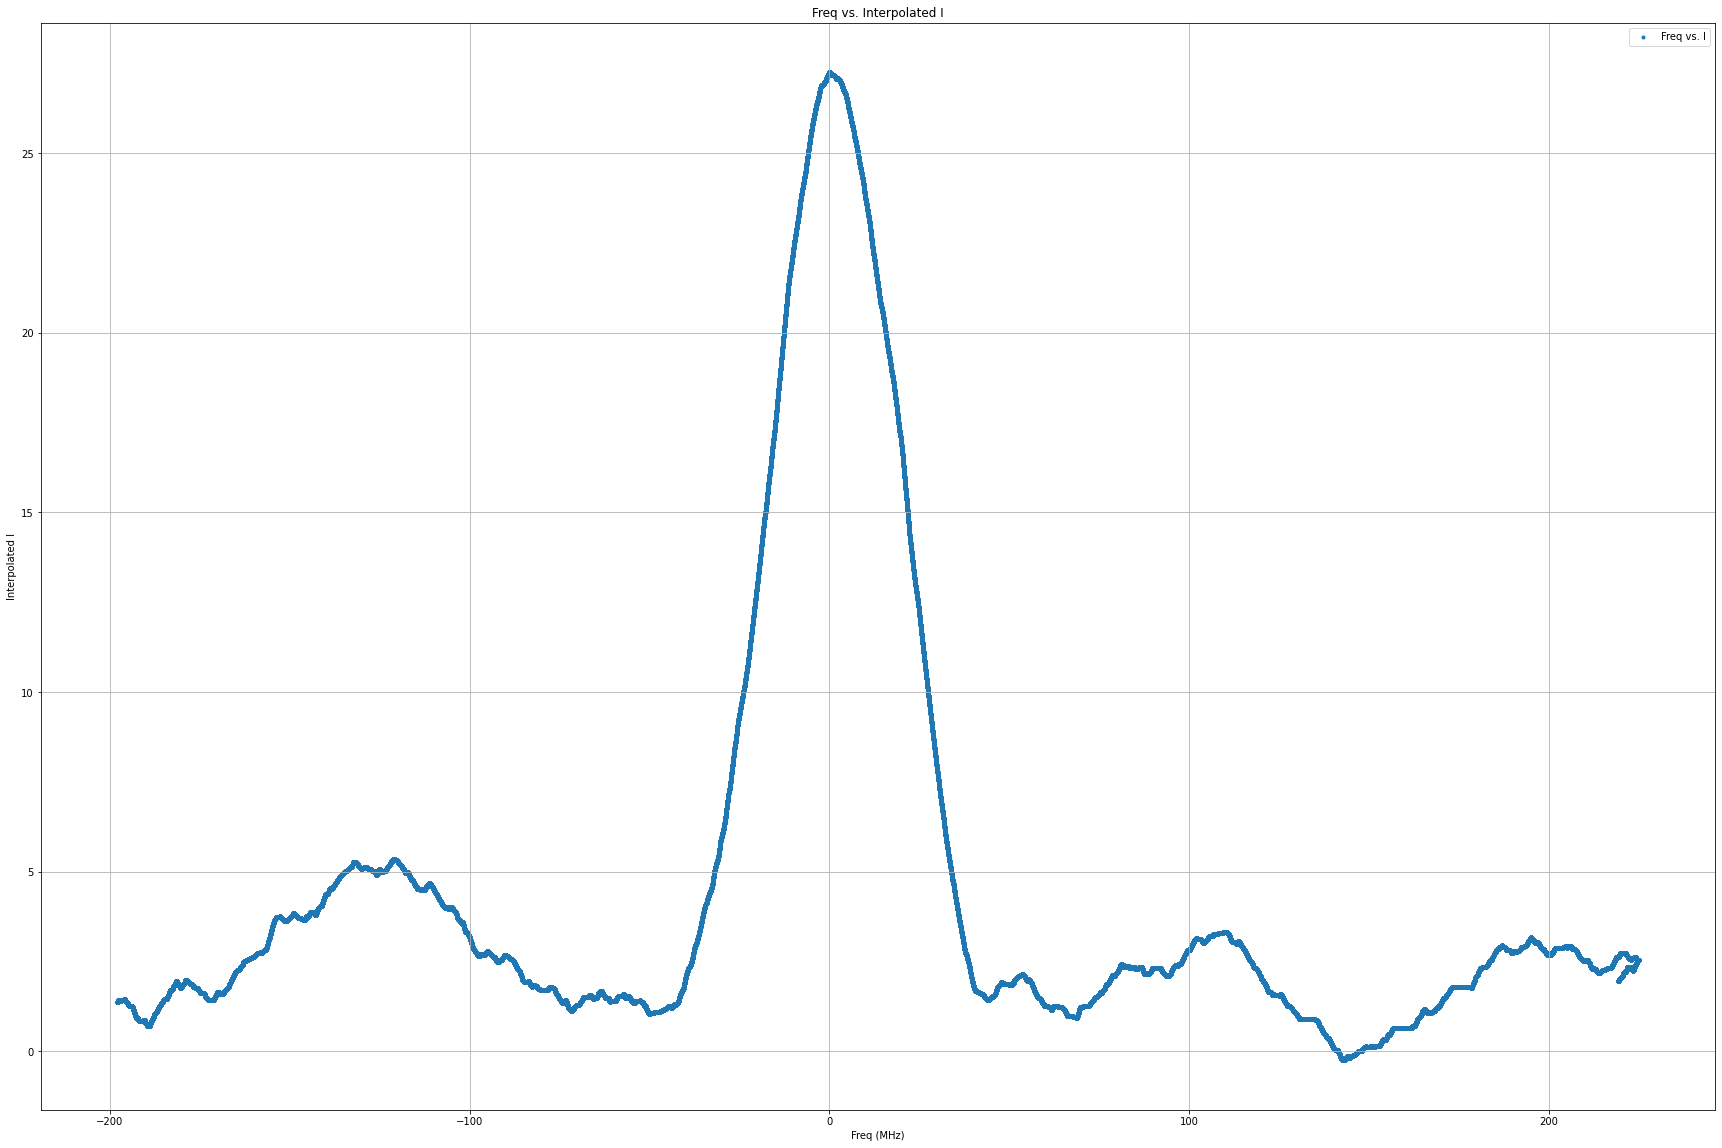

In [319]:
f_interpolated = np.interp(t2, t1, freq)

f_interpolated = f_interpolated-650504.0855669753

plt.scatter(f_interpolated[477502:955005]*1000, w2[477502:955005], marker='.', label='Freq vs. I')

#max peak point
#plt.plot(650504.0855669753,27.2542545145057,'o', color = 'orange')



plt.ylabel('Interpolated I')
plt.xlabel('Freq (MHz)')
plt.title('Freq vs. Interpolated I')


plt.grid()
plt.legend()
plt.show()


In [316]:
#use this code to  find max point and freq
#print(np.max(w2[:477502]), np.argmax(w2[:477502]))
#res2 = f_interpolated[np.argmax(w2[:477502])]

#print(res2)


32.828161731245864 244885
650504.097689418


In [329]:
f_interpolated = np.interp(t2, t1, freq)
for i in range(np.size(w2)):
    if w2[i]==6.577835726145002 or w2[i]==5.3459476335177945:
        print ('intensity: '+str(w2[i])+' index: '+str(i) ,'frequency:' + str(f_interpolated[i]))

intensity: 6.577835726145002 index: 119541 frequency:650503.9846578959
intensity: 5.3459476335177945 index: 867037 frequency:650503.9645857158


In [330]:
det1 = 650503.9846578959 - 650504.097689418
det2 = 650503.9645857158 - 650504.0855669753
print(det1*1000, det2*1000)

-113.03152213804424 -120.98125950433314


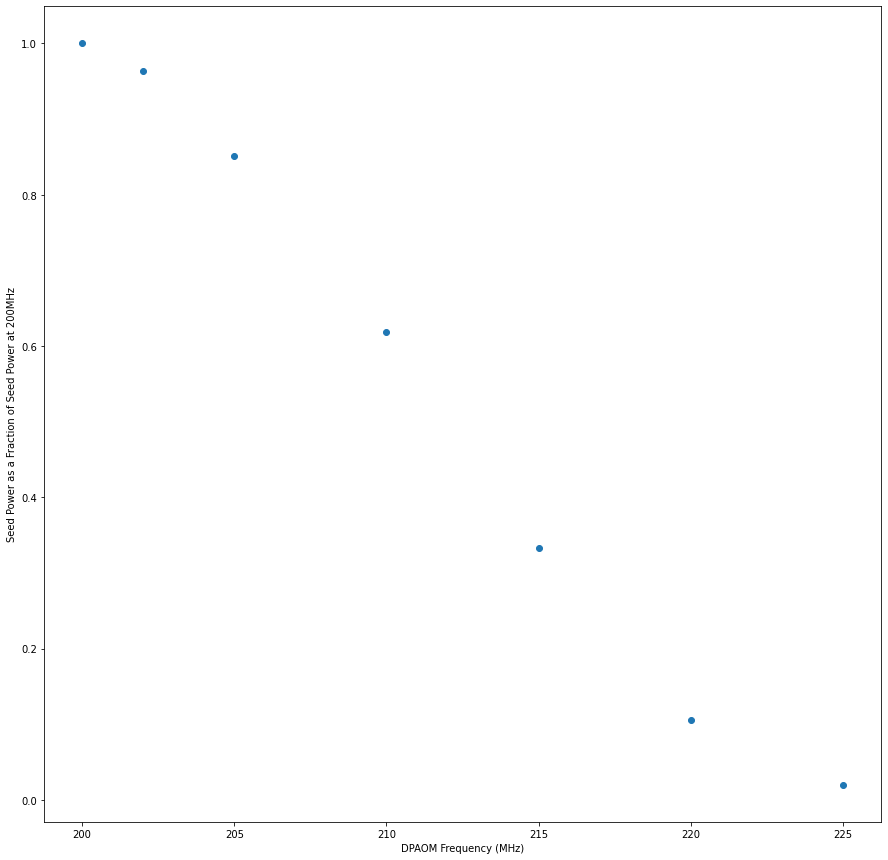

In [333]:
plt.rcParams["figure.figsize"] = (15, 15)
x = [200, 202,205,210,215,220,225]
y = [1 ,34.9/36.2,23/27,16.7/27,9/27,3/28.5,0.6/30]
plt.ylabel('Seed Power as a Fraction of Seed Power at 200MHz')
plt.xlabel('DPAOM Frequency (MHz)')
plt.plot(x,y,'o')



In [94]:
h = 21698.452*100*c*10**-12
h2 = 21698.482*100*c*10**-12
h3 = 14504.351*100*c*10**-12

i = 0.004*100*c*10**-12

#print(21698.452*100*c*10**-12)
#print(h+i,h-i)
print(h,h2,h3)


650.5032259875017 650.5041253648756 434.8295037984758


In [87]:
a = 650.5041012*10**12
a = a*10**-6
b = a-400+125
c = a-400
print(str(a)+' MHz ECDL')
print(str(b)+' MHz Atom Facing')
print(str(c)+' MHz IJD3 WM')

650504101.1999999 MHz ECDL
650503826.1999999 MHz Atom Facing
650503701.1999999 MHz IJD3 WM


In [76]:
#Theoretical difference 461 and 689 = atom facing 461 and 689
th689 = 434.829121311
th461 = 650.5032259875017
thdiff = th461-th689

print(str(thdiff) + 'THz theoretical difference')

#convert thdiff to MHz
thdiff = thdiff*10**12
thdiff = thdiff*10**-6

215.67410467650166THz theoretical difference


In [77]:
A = 434.82927*10**12
A = A*10**-6

atomfacing689 = A - 100

In [78]:
targetatomfacing461 = thdiff + atomfacing689
print(str(targetatomfacing461)+'MHz Target atom facing 461')

targetWM461 = targetatomfacing461 + 400 -125 #no -125 as this isn't on the wavemeter
print(targetWM461)

650503274.6765016MHz Target atom facing 461
650503549.6765016


In [79]:
print(a-targetWM461)
print(a-targetatomfacing461)

551.5234982967377
826.5234982967377
